# CS109b Final Project

# Milestone1

by Danqing Wang, Wenshan Zheng, Zecai Liang
______________

In [24]:
# import libraries
import numpy as np 
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import random

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
import urllib
from bs4 import BeautifulSoup
import time
import re
import tmdbsimple as tmdb
tmdb.API_KEY = '4074d0170761c40d9c07d9016ddd4965'
from collections import Counter

from imdb import IMDb
ia = IMDb()

## 1. Data Extraction


### 1.1 Accessing TMDB and IMDB Data

#### 1.1.1 API code to access the genre and movie poster your favorite movie from TMDB

In [25]:
# set up some basic url link strings, to be used later
APIKeyZ = "api_key=4074d0170761c40d9c07d9016ddd4965"
base_url_search = "https://api.themoviedb.org/3/discover/movie?"
popular_desc = "&sort_by=popularity.desc"
year =  "&primary_release_year={}"
page_number = '&page={}'
query_url = 'https://api.themoviedb.org/3/movie/{}?'
poster_url = "http://image.tmdb.org/t/p/{size}/{path}"
poster_size = ["w92", "w154", "w185", "w342", "w500", "w780", "original"]

In [26]:
# use Beauty and Beast (released in 2017) as an example
movie_name = "beauty and the beast"
# set up the link to search for the movie
movie_url = base_url_search + APIKeyZ + "&query=" + movie_name + year.format(2017)

# take out the TMDB ID and extract details about the movie
page = urllib.urlopen(movie_url).read()
soup = BeautifulSoup(page, "lxml")
prettified = soup.prettify()
id_index = prettified.find('"id"') #find the index for TMDB ID
# Extract ID information
j_beginning = 5
movie_id = ''
while (prettified[id_index + j_beginning].isdigit()):
    movie_id += str(prettified[id_index + j_beginning])
    j_beginning += 1
print "Movie ID is:", movie_id

Movie ID is: 321612


In [27]:
# search movie by ID and access genres
movie = tmdb.Movies(movie_id)
response = movie.info()
movie.genres # seems that it returns genre id and corresponding genre

[{u'id': 14, u'name': u'Fantasy'},
 {u'id': 10402, u'name': u'Music'},
 {u'id': 10749, u'name': u'Romance'}]

In [28]:
# download movie poster
f = open('Beauty_and_Beast.jpg','wb')
f.write(urllib.urlopen(poster_url.format(size = poster_size[6], path = str(movie.poster_path))).read())
f.close()
poster_url.format(size = poster_size[6], path = str(movie.poster_path))

'http://image.tmdb.org/t/p/original//tWqifoYuwLETmmasnGHO7xBjEtt.jpg'

<img src="Beauty_and_Beast.jpg">

#### 1.1.2 Extract genre and other information for this movie from IMDb

In [29]:
# As am example, we search for the movie Beauty and the Beast
s_result = ia.search_movie('Beauty and the Beast')

# Select the top result, Beauty and the Beast (2017)
the_unt = s_result[0]
ia.update(the_unt)
print the_unt.keys() # all possible keys

[u'music department', 'sound crew', 'camera and electrical department', u'distributors', 'rating', 'runtimes', 'costume designer', u'thanks', 'make up', 'year', 'production design', 'miscellaneous crew', 'color info', u'casting department', 'languages', 'votes', 'producer', 'title', 'mpaa', 'assistant director', 'writer', 'casting director', 'visual effects', 'production manager', 'set decoration', 'editor', 'certificates', u'costume department', 'country codes', 'language codes', 'cover url', u'special effects department', 'special effects companies', 'sound mix', u'location management', 'genres', 'director', 'stunt performer', 'miscellaneous companies', 'cinematographer', 'art direction', 'akas', 'aspect ratio', u'production companies', 'kind', u'art department', 'countries', u'transportation department', 'plot outline', 'plot', 'cast', u'animation department', 'original music', u'editorial department', 'canonical title', 'long imdb title', 'long imdb canonical title', 'smart canonic

In [30]:
the_unt['title']

u'Beauty and the Beast'

In [31]:
the_unt['year']

2017

In [32]:
the_unt['genres']

[u'Family', u'Fantasy', u'Musical', u'Romance']

The genres labeled by IMDb for `Beauty and the Beast` are `family`, `Fantasy`, `Musical`, and `Romance`. 

#### 1.1.3 A list of the 10 most popular movies of 2016 from TMDb, and their genre obtained via the API, and confirm if the genre is consistent with IMDB data

#### TMDb

In [33]:
# first extract TMDB ID of each movie, then use package tmdbsimple to obtain genre information
popular_movies_2016 =  base_url_search + APIKeyZ + popular_desc + year.format(2016)
page = urllib.urlopen(popular_movies_2016).read()
soup = BeautifulSoup(page, "lxml")
prettified = soup.prettify()
movie_list = [m.start() for m in re.finditer('"id"', prettified)] # this finds all indexes of occurences of "id"
movie_id_list = []
for i in range(10):
    i_beginning = 5
    movie_id_temp = ''
    while (prettified[movie_list[i] + i_beginning].isdigit()):
        movie_id_temp += str(prettified[movie_list[i] + i_beginning])
        i_beginning += 1
    movie_id_list += [int(movie_id_temp)]

In [34]:
movie_data = [] # to store movie information
for i in range(len(movie_id_list)):
    movie = tmdb.Movies(movie_id_list[i])
    response = movie.info()
    movie_data += [response]

In [35]:
# Extract IMDB ID
IMDB_ID = []
for i in range(len(movie_data)):
    IMDB_ID += [int(str(movie_data[i]['imdb_id'])[2:])]

In [36]:
TMDB_genre_list = [] # to store genre information from TMDB
for i in range(len(movie_data)):
    genre_temp = []
    for k in range(len(movie_data[i]['genres'])):
        genre_temp += [str((movie_data[i]['genres'][k]['name']))]
    TMDB_genre_list += [genre_temp]
TMDB_genre_list

[['Animation', 'Comedy', 'Drama', 'Family', 'Music'],
 ['Adventure', 'Action', 'Fantasy'],
 ['Adventure', 'Animation', 'Comedy', 'Family'],
 ['Action', 'Adventure', 'Comedy', 'Romance'],
 ['Action', 'Drama', 'Science Fiction', 'War'],
 ['Action', 'Adventure', 'Fantasy', 'Science Fiction'],
 ['Drama', 'Science Fiction'],
 ['Action', 'Science Fiction'],
 ['Action', 'Horror'],
 ['Drama']]

#### IMDb

In [37]:
## Store genre information into dataframe
IMDb_genre_list = []
title = []
for i in range(0, 10):
    movie = ia.get_movie(IMDB_ID[i]) # grab movie data by id
    ia.update(movie)
    title += [str(movie['title'])]
    genre_temp = []
    for j in range(len(movie['genres'])):
        genre_temp += [str(movie['genres'][j])]
    IMDb_genre_list += [sorted(genre_temp)]    

In [38]:
IMDb_genre_list

[['Animation', 'Comedy', 'Family', 'Music'],
 ['Adventure', 'Family', 'Fantasy'],
 ['Adventure', 'Animation', 'Comedy', 'Family'],
 ['Action', 'Adventure', 'Comedy', 'Romance', 'Sci-Fi'],
 ['Action', 'Adventure', 'Sci-Fi'],
 ['Action', 'Adventure', 'Fantasy', 'Sci-Fi'],
 ['Drama', 'Mystery', 'Sci-Fi', 'Thriller'],
 ['Action', 'Adventure', 'Sci-Fi'],
 ['Action', 'Horror'],
 ['Biography', 'Drama']]

#### Comparing TMDb and IMDb genre labels:

_______________________

### 1.2 Larger Scale: Extract Top 500 Movie
We import the list of top 500 movies from TMDb and extract infomation for these movies from the IMDb database. We use this data in our exploratory data analysis in section 2.

#### 1.2.1 Extract Top 500 Movie from TMDB

In [39]:
# get top 500 popular movies ID, to be used for further search of IMDB ID
number_page = 0
movie_id_list = []
for i in range(1, 26):
    popular_movies =  base_url_search + APIKeyZ + popular_desc + page_number.format(i)
    page = urllib.urlopen(popular_movies).read()
    soup = BeautifulSoup(page, "lxml")
    prettified = soup.prettify()
    movie_list = [m.start() for m in re.finditer('"id"', prettified)] # this finds all indexes of occurences of "id"
    
    for j in range(len(movie_list)):
        j_beginning = 5
        movie_id_temp = ''
        while (prettified[movie_list[j] + j_beginning].isdigit()):
            movie_id_temp += str(prettified[movie_list[j] + j_beginning])
            j_beginning += 1
        movie_id_list += [int(movie_id_temp)]
    if i % 40 == 0:
        time.sleep(10)
    

In [40]:
# query each movie by TMDB ID and get IMDB ID
movie_id_list_IMDB = []
for i in range(len(movie_id_list)):
    page_url = query_url.format(movie_id_list[i]) + APIKeyZ
    page = urllib.urlopen(page_url).read()
    soup = BeautifulSoup(page, "lxml")
    prettified = soup.prettify()
    imdb_id_index = prettified.find('"imdb_id"')
    j_beginning = 13
    movie_id_temp = ''
    while (prettified[prettified.find('"imdb_id"') + j_beginning].isdigit()):
        movie_id_temp += str(prettified[prettified.find('"imdb_id"') + j_beginning])
        j_beginning += 1
    movie_id_list_IMDB += [movie_id_temp]
    if i % 40 == 39:
        time.sleep(10.1)

In [41]:
# Write out movie TMDB IDs
thefile = open('popular_tmdb_id.txt', 'w')
for item in movie_id_list:
    thefile.write("%s\n" % item)
thefile.close()

In [42]:
# Write out movie IMDB IDs 
thefile = open('popular_imdb_id.txt', 'w')
for item in movie_id_list_IMDB:
    thefile.write("%s\n" % item)
thefile.close()

In [43]:
# search one movie by ID and create list of column names
movie = tmdb.Movies(movie_id_list[0])
response = movie.info()
columns = []
for i in range(len(response)):
    column_temp = [str(response.items()[i][0])]
    columns += column_temp

In [44]:
# create a dataframe to store information of top 500 popular movies
index = range(0, len(movie_id_list)) 
df = pd.DataFrame(index = index, columns=columns)
df = df.fillna(0)

In [45]:
# store information into dataframe, some information received is stroed as a list thus we convert it into strings
for i in range(len(index)):
    movie = tmdb.Movies(movie_id_list[i])
    response = movie.info()
    if i % 40 == 39:
        time.sleep(11)
    for j in range(0, len(columns)):
        if j == 1:
            country_temp = []
            for k in range(len(response[columns[j]])):
                country_temp += [(response[columns[j]][k]['name'])]
            df.iloc[i,j] = str(country_temp)
        elif j == 6:
            genre_temp = []
            for k in range(len(response[columns[j]])):
                genre_temp += [(response[columns[j]][k]['name'])]
            df.iloc[i,j] = str(genre_temp)
        elif j == 11:
            if response[columns[j]] != None:
                df.iloc[i,j] = str(response[columns[j]])
        elif j == 14:
            language_temp = []
            for k in range(len(response[columns[j]])):
                language_temp += [(response[columns[j]][k]['iso_639_1'])]
            df.iloc[i,j] = str(language_temp)
        elif j == 18:
            company_temp = []
            for k in range(len(response[columns[j]])):
                company_temp += [(response[columns[j]][k]['name'])]
            df.iloc[i,j] = str(company_temp)
        else:
            df.iloc[i,j] = response[columns[j]]
df.head()

,poster_path,production_countries,revenue,overview,video,id,genres,title,tagline,vote_count,...,imdb_id,adult,backdrop_path,production_companies,release_date,popularity,original_title,budget,vote_average,runtime
0,/tWqifoYuwLETmmasnGHO7xBjEtt.jpg,[u'United States of America'],886404735,A live-action adaptation of Disney's version o...,False,321612,"[u'Fantasy', u'Music', u'Romance']",Beauty and the Beast,Be our guest.,1287,...,tt2771200,False,/6aUWe0GSl69wMTSWWexsorMIvwU.jpg,"[u'Walt Disney Pictures', u'Mandeville Films']",2017-03-17,180.799244,Beauty and the Beast,160000000,7.1,129
1,/45Y1G5FEgttPAwjTYic6czC9xCn.jpg,[u'United States of America'],586061420,"In the near future, a weary Logan cares for an...",False,263115,"[u'Action', u'Drama', u'Science Fiction']",Logan,His Time Has Come,2124,...,tt3315342,False,/5pAGnkFYSsFJ99ZxDIYnhQbQFXs.jpg,"[u'Twentieth Century Fox Film Corporation', u""...",2017-02-28,111.854142,Logan,97000000,7.6,141
2,/s9ye87pvq2IaDvjv9x4IOXVjvA7.jpg,[u'United States of America'],601303829,A koala named Buster recruits his best friend ...,False,335797,"[u'Animation', u'Comedy', u'Drama', u'Family',...",Sing,Auditions begin 2016.,1022,...,tt3470600,False,/fxDXp8un4qNY9b1dLd7SH6CKzC.jpg,"[u'Universal Pictures', u'Fuji Television Netw...",2016-11-23,75.005907,Sing,75000000,6.7,108
3,/5wBbdNb0NdGiZQJYoKHRv6VbiOr.jpg,[u'United States of America'],479628833,Explore the mysterious and dangerous home of t...,False,293167,"[u'Science Fiction', u'Action', u'Adventure', ...",Kong: Skull Island,All hail the king,889,...,tt3731562,False,/pGwChWiAY1bdoxL79sXmaFBlYJH.jpg,"[u'Warner Bros.', u'Legendary Entertainment']",2017-03-08,56.579741,Kong: Skull Island,190000000,6.1,118
4,/myRzRzCxdfUWjkJWgpHHZ1oGkJd.jpg,[u'United States of America'],60100336,"In the near future, Major is the first of her ...",False,315837,"[u'Action', u'Drama', u'Science Fiction']",Ghost in the Shell,,264,...,tt1219827,False,/lsRhmB7m36pEX0UHpkpJSE48BW5.jpg,"[u'Paramount Pictures', u'DreamWorks SKG', u'G...",2017-03-29,52.868110,Ghost in the Shell,110000000,6.4,106


In [46]:
# write the dataframe out
df.to_csv('TMDb_data.txt', encoding='utf-8')

#### 1.2.2 Extract Data of the Same Top 500 Movie from IMDB

In [25]:
# Import TMDb top 500 movies using imdb_ids
id_list = pd.read_csv('popular_imdb_id.txt', header=None)
ID = np.array(id_list)

In [26]:
# Prepare an empty dataframe to record data 
# Among the different variables, we select the following variables of interest in our analysis  
columns = ['title','genres', 'director', 'distributors', 'year', 'rating', 'votes', 'runtimes', 
          'language codes', 'languages', 'producer', 'mpaa', 'writer', 'top 250 rank', 'kind', 
           'country codes', 'countries', 'cover url', 'aspect_ratio', 'production companies', 
           'cinematographer', 'plot outline', 'plot', 'cast', 'animation department', 'original music',
           'canonical title', 'editorial department', 'canonical title', 'long imdb title',
           'long imdb canonical title', 'smart canonical title', 'smart long imdb canonical title',
           'full-size cover url']
index = range(1, len(ID)+1) 

df = pd.DataFrame(index = index, columns=columns)
df = df.fillna(0)

In [ ]:
######################################
######################################
### DO NOT RUN THIS BLOCK OF CODES ###
######################################
# Run this block of codes takes a long
# time, only do so when IMDb_data.txt
# is not availabe locally. 
######################################
######################################


# Fill in dataframe df 
for i in range(0, len(index)):
    movie = ia.get_movie(ID[i]) # grab movie data by id
    ia.update(movie)
    keys = movie.keys() # generate the available keys of this particular movie 
    
    for j in range(0, len(columns)):
        if columns[j] in keys:
            if type(movie[columns[j]]) == list:
                result = str(movie[columns[j]])
            else:
                result = movie[columns[j]]
            df.iloc[i,j] = result
        else:
            df.iloc[i,j] = 'nan'

# add column if IDs to the dataframe
df['imdb_ids'] = pd.Series(ID.reshape(500,), index = df.index)

# export dataframe to txt file
df.to_csv('IMDb_data.txt', encoding='utf-8')

----------------------------------------------

## 2. Exploratory Analysis 

Next, we want to take a look the two database about the most popular 500 movies, and perform some exploratory analysis. 

The data from TMDB is saved locally as "TMDB_data.txt", and the data from IMDB is saved locally as "IMDB.txt".

### 2.1 Genre

#### 2.1.1 Genre Information from the IMDB Website

We know from the IMDB website (http://www.imdb.com) that the website categorize movies into 27 genres, as seen in the following picture:
<img src="IMDB_web_genre.PNG">

We saved the information to a local file "IMDB_web_genre.txt", and would compare the information on the website to the two dataset we extracted from TMDB and IMDB.

In [27]:
top500_IMDB_web = pd.read_csv('IMDB_web_genre.csv')

IOError: File IMDB_web_genre.csv does not exist

In [15]:
top500_IMDB_web.head()

,Genre,Count
0,Drama,1027694
1,Romance,279500
2,Short,171957
3,Comedy,149370
4,Crime,113705


---
#### 2.1.2 Genre Information from the IMDB Database
Next we calculate the genre information from the [top 500 movie data] (saved as "IMDB_data.txt") sampled from IMDB database.

In [28]:
## data frame extracted from IMDB by movieID (top-500 in TMDB)
top500_IMDB = pd.read_csv("IMDB_data.txt")

top500_IMDB.columns.values

array(['Unnamed: 0', 'title', 'genres', 'director', 'distributors', 'year',
       'rating', 'votes', 'runtimes', 'language codes', 'languages',
       'producer', 'mpaa', 'writer', 'top 250 rank', 'kind',
       'country codes', 'countries', 'cover url', 'aspect_ratio',
       'production companies', 'cinematographer', 'plot outline', 'plot',
       'cast', 'animation department', 'original music', 'canonical title',
       'editorial department', 'canonical title.1', 'long imdb title',
       'long imdb canonical title', 'smart canonical title',
       'smart long imdb canonical title', 'full-size cover url', 'imdb_ids'], dtype=object)

#### Parse `genres` into dummy coding


In [29]:
## ideally coule package this code into a function of spliting all variables, input:
# 1. head and tail characters to delet
# 2. split by

gr = top500_IMDB.ix[:, 'genres']

## Split variable `Genres` into list of strings

for i in range(len(gr)):
        # each row in 'genres' column
    st = gr[i]
#### -------------------------- for spliting other variables, change here -------------------------
        # delete the first three character " [u' ", and the last two charactor " '] "
        # split by " ' u "
    ls = st[3:-2].split("', u'") 
        # return a list to the 'genres' column
    gr[i] = ls
    
top500_IMDB_genre = pd.DataFrame(gr)["genres"].str.join(sep='*').str.get_dummies(sep='*')
top500_IMDB_genre['imdb_id'] = top500_IMDB['imdb_ids']

top500_IMDB_genre.head()

,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,...,Musical,Mystery,Romance,Sci-Fi,Short,Sport,Thriller,War,Western,imdb_id
0,0,0,0,0,0,0,0,0,0,1,...,1,0,1,0,0,0,0,0,0,2771200
1,1,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,3315342
2,0,0,0,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3470600
3,1,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,3731562
4,1,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,369610


In [31]:
## count number of labels for each genre
top500_IMDB_genre_count = top500_IMDB_genre.sum(axis = 0)
top500_IMDB_genre_count.head()

Action       210
Adult          1
Adventure    220
Animation     55
Biography     22
dtype: int64

In [32]:
## save as local files
top500_IMDB_genre.to_csv('IMDB_split_genre.txt') # include 'imdb_id'
top500_IMDB_genre_count.to_csv('IMDB_split_genre_count.txt')

---
#### 2.1.2 Genre Information from the TMDB Database
Similarly we organize the genre information from the [top 500 movie data] (saved as "TMDB_data.txt") sampled from TMDB database.

In [35]:
## data frame extracted from TMDB by movieID
top500_TMDB = pd.read_csv("TMDB_data.txt")

top500_TMDB.columns.values

array(['Unnamed: 0', 'poster_path', 'production_countries', 'revenue',
       'overview', 'video', 'id', 'genres', 'title', 'tagline',
       'vote_count', 'homepage', 'belongs_to_collection',
       'original_language', 'status', 'spoken_languages', 'imdb_id',
       'adult', 'backdrop_path', 'production_companies', 'release_date',
       'popularity', 'original_title', 'budget', 'vote_average', 'runtime'], dtype=object)

In [36]:
## ideally coule package this code into a function of spliting all variables, input:
# 1. head and tail characters to delet
# 2. split by

gr = top500_TMDB.ix[:, 'genres']

## Split variable `Genres` into list of strings
 
for i in range(len(gr)):
        # each row in 'genres' column
    st = gr[i]
#### -------------------------- for spliting other variables, change here -------------------------
        # delete the first three character " [u' ", and the last two charactor " '] "
        # split by " ' u "
    ls = st[3:-2].split("', u'") 
        # return a list to the 'genres' column
    gr[i] = ls
    
top500_TMDB_genre = pd.DataFrame(gr)["genres"].str.join(sep='*').str.get_dummies(sep='*')
top500_TMDB_genre['imdb_id'] = top500_IMDB['imdb_ids']

top500_TMDB_genre.head()

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,imdb_id
0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,2771200
1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,3315342
2,0,0,1,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,3470600
3,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,3731562
4,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,369610


In [37]:
## count number of labels for each genre
top500_TMDB_genre_count = top500_TMDB_genre.sum(axis = 0)
top500_TMDB_genre_count.head()

Action       217
Adventure    190
Animation     54
Comedy       101
Crime         73
dtype: int64

In [38]:
## save as local files
top500_TMDB_genre.to_csv('TMDB_split_genre.txt') # include 'imdb_id'
top500_TMDB_genre_count.to_csv('TMDB_split_genre_count.txt')

---
#### 2.1.3 Basic statistics about genre

#### Q. How many genres in total? 
Check the differences between the three information sources: IMDB website, IMDB database, TMDB database.

In [41]:
## total number of genres
print "Total Number of Genres from the IMDB website:", top500_IMDB_web.shape[0]
print "Total Number of Genres from the IMDB database:" , (top500_IMDB_genre.shape[1] - 1)
print "Total Number of Genres from the RMDB database:" , (top500_TMDB_genre.shape[1] - 1)

 Total Number of Genres from the IMDB website:

NameError: name 'top500_IMDB_web' is not defined

#### Q. How many movies for each genre?
Check the differences between the three information sources: IMDB website, IMDB database, TMDB database.

In [34]:
## number of genres for each movie, saved in variable 'n_genre'
top500_IMDB_genre['n_genre'] = top500_IMDB_genre.sum(axis = 1)

#### Q. How many genre labels for each movie?
Check the differences between the three information sources: IMDB website, IMDB database, TMDB database.

#### 2.1.2 Heatmap between genrens

In [ ]:
###  Zecai

### 2.2 Genre vs Other Variables

#### 2.2.1 Quantitative:

#### A. Year of Release

In [46]:
## Extracting the year column
top500_IMDB_year = top500_IMDB.ix[:, 'year']

## Create a new dataframe containing information of genre and year
top500_IMDB_genre_year = top500_IMDB_genre.ix[:, :-1].copy()
top500_IMDB_genre_year['year'] = pd.Series(top500_IMDB_year, index = top500_IMDB_genre_year.index)

In [47]:
year_list = sorted(top500_IMDB_genre_year['year'].unique())
df_genre_year = pd.DataFrame(columns=year_list)

# Create a dataframe with number of films for a particular genre and year 
for i in range(0, len(year_list)):
    temp = top500_IMDB_genre.ix[:, :-1][top500_IMDB_genre_year['year'] == year_list[i]]
    temp.sum(axis = 0)
    df_genre_year.iloc[:, i] = temp.sum(axis = 0)

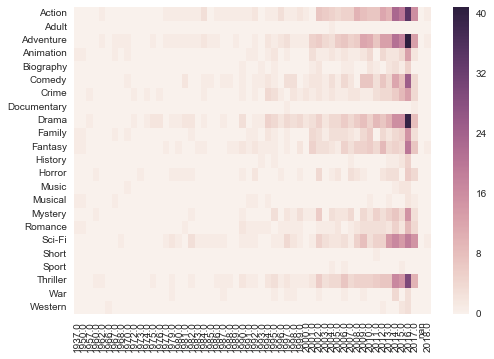

In [48]:
import seaborn as sns
sns.heatmap(df_genre_year)
plt.show()

#### B. Rating

In [50]:
## Extracting the year column
top500_IMDB_rating = top500_IMDB.ix[:, 'rating']

## Create a new dataframe containing information of genre and rating
top500_IMDB_genre_rating = top500_IMDB_genre.ix[:, :-1].copy()
top500_IMDB_genre_rating['rating'] = pd.Series(top500_IMDB_rating, index = top500_IMDB_genre_rating.index)

In [51]:
rating_list = sorted(top500_IMDB_genre_rating['rating'].unique())
min(rating_list), max(rating_list)

(3.8999999999999999, 9.3000000000000007)

In [52]:
rating_list = [0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]

In [53]:
df_genre_rating = pd.DataFrame(columns=rating_list)

# Create a dataframe with number of films for a particular genre and year 
for i in range(0, len(rating_list)):
    temp = top500_IMDB_genre.ix[:, :-1][top500_IMDB_genre_rating['rating'] > rating_list[i]-0.5][top500_IMDB_genre_rating['rating'] < rating_list[i]+0.5]
    temp.sum(axis = 0)
    df_genre_rating.iloc[:, i] = temp.sum(axis = 0)

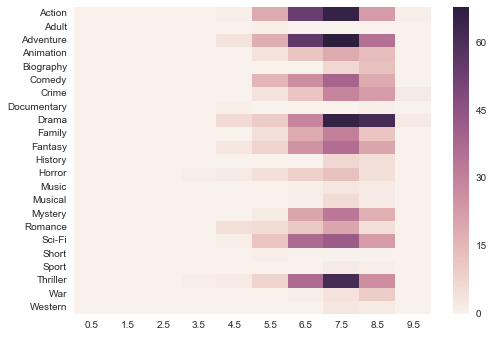

In [54]:
sns.heatmap(df_genre_rating)
plt.show()

#### C. Votes

In [55]:
## Extracting the year column
top500_IMDB_votes = top500_IMDB.ix[:, 'votes']

## Create a new dataframe containing information of genre and rating
top500_IMDB_genre_votes = top500_IMDB_genre.ix[:, :-1].copy()
top500_IMDB_genre_votes['votes'] = pd.Series(top500_IMDB_votes, index = top500_IMDB_genre_votes.index)

In [56]:
top500_IMDB_genre_votes = top500_IMDB_genre_votes[pd.notnull(top500_IMDB_votes)]

In [60]:
votes_list = np.linspace(0, 1800000, 19)


In [58]:
df_genre_votes = pd.DataFrame(columns=votes_list[:-1])

# Create a dataframe with number of films for a particular genre and year 
for i in range(0, len(votes_list)-1):
    temp = top500_IMDB_genre_votes.ix[:, :-1][top500_IMDB_genre_votes['votes'] > votes_list[i]][top500_IMDB_genre_votes['votes'] < votes_list[i+1]]
    temp.sum(axis = 0)
    df_genre_votes.iloc[:, i] = temp.sum(axis = 0)

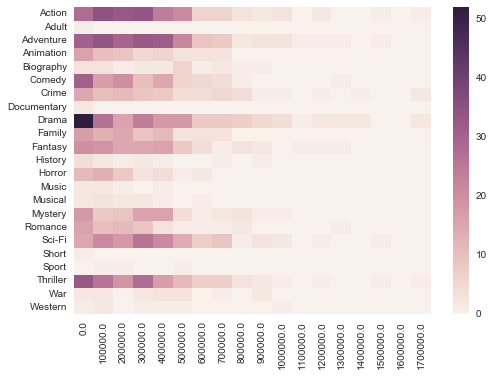

In [59]:
sns.heatmap(df_genre_votes)
plt.show()

#### 2.2.2 Qualitative:
- language
- country of release
- MAPP   

In [ ]:
# Zecai

#### 2.2.3 Production related:
- director
- writer
- distributor (company)
- major cast

We suspect that some distributors are more likely to produce movies with specific styles thus can be tightly correlated with some kinds of genres. The same goes with directors, writers, actors/actresses and so on. Here, with production company "Walt Disney Pictures", director Martin Scorsese and actor Arnold Schwarzenegger as examples, we check if there is this kind of correlations.

###  Genres of Walt Disney Pictures

In [62]:
# API request url for Walt Disney Pictures movies
company_url = base_url_search + APIKeyZ + popular_desc + "&with_companies=2"

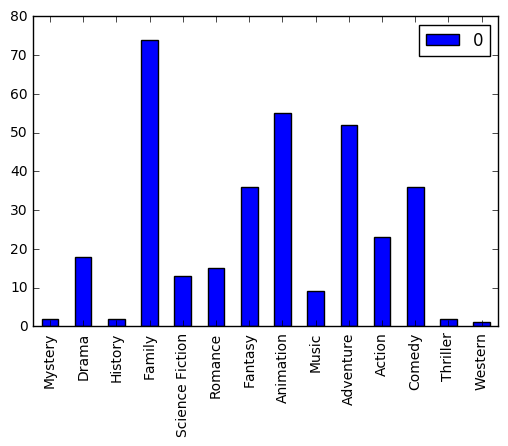

In [63]:
# get top 100 popular movies IDs by Walt Disney Pictures, to be used for further search of genres
number_page = 0
WDP_movie_id_list = []
for i in range(1, 6):
    WDP_movies =  company_url + page_number.format(i)
    page = urllib.urlopen(WDP_movies).read()
    soup = BeautifulSoup(page, "lxml")
    prettified = soup.prettify()
    movie_list = [m.start() for m in re.finditer('"id"', prettified)] # this finds all indexes of occurences of "id"
    
    for j in range(len(movie_list)):
        j_beginning = 5
        movie_id_temp = ''
        while (prettified[movie_list[j] + j_beginning].isdigit()):
            movie_id_temp += str(prettified[movie_list[j] + j_beginning])
            j_beginning += 1
        WDP_movie_id_list += [int(movie_id_temp)]
    if i % 40 == 39:
        time.sleep(10)
time.sleep(10)        
# store movie information
WDP_movie_data = [] # to store movie information
for i in range(len(WDP_movie_id_list)):
    movie = tmdb.Movies(WDP_movie_id_list[i])
    response = movie.info()
    WDP_movie_data += [response]
    if i % 40 == 39:
        time.sleep(11)

# store genre information of all movies
WDP_genre_list = [] # to store genre information from TMDB
for i in range(len(WDP_movie_data)):
    genre_temp = []
    for k in range(len(WDP_movie_data[i]['genres'])):
        genre_temp += [str((WDP_movie_data[i]['genres'][k]['name']))]
    WDP_genre_list += genre_temp
WDP_genre_list[:5]

# make histogram of genres
genre_counts = Counter(WDP_genre_list)
df = pd.DataFrame.from_dict(genre_counts, orient='index')
df.plot(kind='bar')

Clearly seen from above histogram, movies from Walt Disney Pictures tend to be in genres Family, Animation, Adventure and Comedy.

###  Genres of Martin Scorsese movies

In [64]:
# API request url for Martin Scorsese movies
director_url = base_url_search + APIKeyZ + popular_desc + "&with_people=1032"

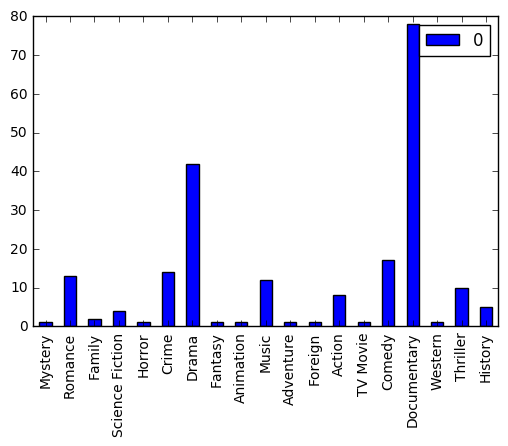

In [65]:
# get all movie IDs by Martin Scorsese, to be used for further search of genres
number_page = 0
MS_movie_id_list = []
for i in range(1, 9):
    MS_movies =  director_url + page_number.format(i)
    page = urllib.urlopen(MS_movies).read()
    soup = BeautifulSoup(page, "lxml")
    prettified = soup.prettify()
    movie_list = [m.start() for m in re.finditer('"id"', prettified)] # this finds all indexes of occurences of "id"
    
    for j in range(len(movie_list)):
        j_beginning = 5
        movie_id_temp = ''
        while (prettified[movie_list[j] + j_beginning].isdigit()):
            movie_id_temp += str(prettified[movie_list[j] + j_beginning])
            j_beginning += 1
        MS_movie_id_list += [int(movie_id_temp)]
    if i % 40 == 39:
        time.sleep(10)    
time.sleep(10)        
# store movie information
MS_movie_data = [] # to store movie information
MS_movie_id_list.remove(MS_movie_id_list[107]) # The 107 value returns an error, remove this value
for i in range(len(MS_movie_id_list)):
    movie = tmdb.Movies(MS_movie_id_list[i])
    response = movie.info()
    MS_movie_data += [response]
    if i % 40 == 39:
        time.sleep(11)
        
# store genre information of all movies
MS_genre_list = [] # to store genre information from TMDB
for i in range(len(MS_movie_data)):
    genre_temp = []
    for k in range(len(MS_movie_data[i]['genres'])):
        genre_temp += [str((MS_movie_data[i]['genres'][k]['name']))]
    MS_genre_list += genre_temp
MS_genre_list[:5]

# make histogram of genres
genre_counts = Counter(MS_genre_list)
df = pd.DataFrame.from_dict(genre_counts, orient='index')
df.plot(kind='bar')

Clearly seen from above histogram, movies related to Martin Scorsese tend to be in genres Documentary and Drama.

###  Genres of Arnold Schwarzenegger movies

In [66]:
# API request url for Arnold Schwarzenegger movies
actor_url = base_url_search + APIKeyZ + popular_desc + "&with_people=1100"

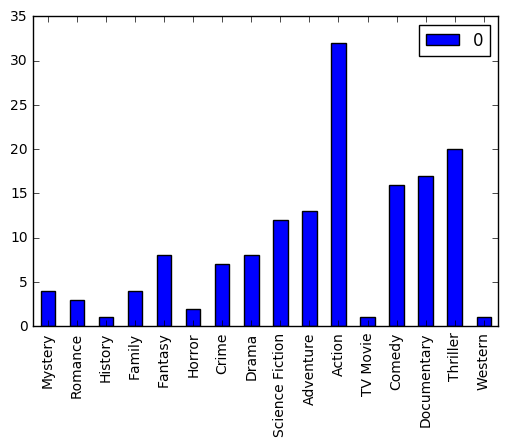

In [67]:
# get all movie IDs by Arnold Schwarzenegger, to be used for further search of genres
number_page = 0
AS_movie_id_list = []
for i in range(1, 5):
    AS_movies =  actor_url + page_number.format(i)
    page = urllib.urlopen(AS_movies).read()
    soup = BeautifulSoup(page, "lxml")
    prettified = soup.prettify()
    movie_list = [m.start() for m in re.finditer('"id"', prettified)] # this finds all indexes of occurences of "id"
    
    for j in range(len(movie_list)):
        j_beginning = 5
        movie_id_temp = ''
        while (prettified[movie_list[j] + j_beginning].isdigit()):
            movie_id_temp += str(prettified[movie_list[j] + j_beginning])
            j_beginning += 1
        AS_movie_id_list += [int(movie_id_temp)]
    if i % 40 == 39:
        time.sleep(10)    
time.sleep(10)
# store movie information
AS_movie_data = [] # to store movie information
for i in range(len(AS_movie_id_list)):
    movie = tmdb.Movies(AS_movie_id_list[i])
    response = movie.info()
    AS_movie_data += [response]
    if i % 40 == 39:
        time.sleep(11)
        
# store genre information of all movies
AS_genre_list = [] # to store genre information from TMDB
for i in range(len(AS_movie_data)):
    genre_temp = []
    for k in range(len(AS_movie_data[i]['genres'])):
        genre_temp += [str((AS_movie_data[i]['genres'][k]['name']))]
    AS_genre_list += genre_temp
AS_genre_list[:5]

# make histogram of genres
genre_counts = Counter(AS_genre_list)
df = pd.DataFrame.from_dict(genre_counts, orient='index')
df.plot(kind='bar')

Clearly seen from above histogram, Arnold Schwarzenegger movies are most likely to be in genre Action, a few other genres such as Thriller, Documentary and Comedy are also common.

From above 3 examples, we found that movies from specific companies, directors and actors/actresses tend to be in one or a few genres, there is a strong correlations between the crew/production company of a movie and the genre(s) of a movie. Crew members and production companies can be good variables to predict genres of a movie. 

#### 2.2.4 Text Analysis:
- plot outline
- plot
- title
- reason for MPAA rating

In [2]:
# not now

--------

## 3. Challenges for Next Step 

Hints:
Comments on what challenges you see for predicting movie genre based on the data you have, and how to address them

Zecai
- multiple genres / how many genres to predict
- assemble data (how much to sample? download the whole?

Danqing
- missing information / sparse data for some genres
- merge/combine two database (inconsistency)

Wenshan
- feature selection? 
- whether text analysis?

### Feature Selection

Another possible problem is to select features. This can be very necessary because for each movie, APIs only return 25 and 36 variables from TMDB and IMDB, respectively. Furthermore, there are lots of other resources such as Wikipedia and forums which provide tons of information about each movie. If we use all available predictors, not only it will be very time-consuming to train prediction models but also the models will become unstable. 


As of now, we tentatively separate predictors as numeric variables, categorical variables, texts and posters. To select numeric and categorical variables, we can train models with different variables and compare models to see if some variables are necessary. For texts, we think that official abstract, Wikipedia abstract, plots and highlighted comments from forums can concise and we will see if this is true.  For posters, we don’t have much experience yet, but most popular or official posters can be better predictors for models.